In [1]:
import os
os.chdir('../..')

In [2]:
from classes.matching import Matching

import numpy as np
import json
import pandas as pd
from datetime import datetime
import time

from classes.helpers import *

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

notext = {'ba': 'nan', 'rb': ''}

data_folder = '../data/'
save_folder = '../figures/all/3-standardization/'

# Scatter plot

In [227]:
# Load files    
df = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

# params
min_nbr_ratings = 5
df = df[(df['ba']['nbr_ratings'] >= min_nbr_ratings) & (df['rb']['nbr_ratings'] >= min_nbr_ratings)]
df.index = range(len(df))

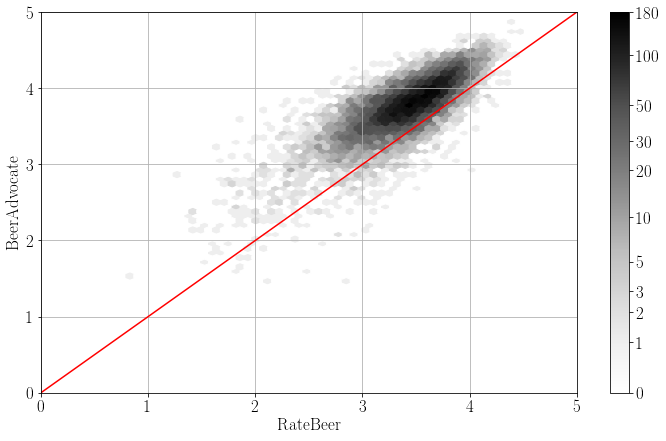

In [239]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 180]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

hb = ax.hexbin(df['rb']['avg_computed'], df['ba']['avg_computed'], gridsize=50, bins='log', cmap='Greys')
ax.plot([0, 5], [0, 5], 'red')

ax.axis([0, 5, 0, 5])

#cb1 = plt.colorbar(hb, ax=ax)

#nbr_ticks = 10
#delta = (cb1.vmax - cb1.vmin)/nbr_ticks

#ticks = []
#log_ticks = []
#for i in np.arange(cb1.vmin, cb1.vmax+delta, delta):
#    log_ticks.append(i)
#    if i == cb1.vmin or i == cb1.vmax:
#        ticks.append('{:.0f}'.format(10**i-1))
#    else:
#        ticks.append('{:.2f}'.format(10**i-1))
#
#cb1.remove()

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()
plt.savefig(save_folder + 'hexhist_ratings.pdf', bbox_inches='tight')

In [240]:
print(max(np.max(df['rb']['zscore']), np.max(df['ba']['zscore'])))
print(min(np.min(df['rb']['zscore']), np.min(df['ba']['zscore'])))

1.90408208174
-4.89789994117


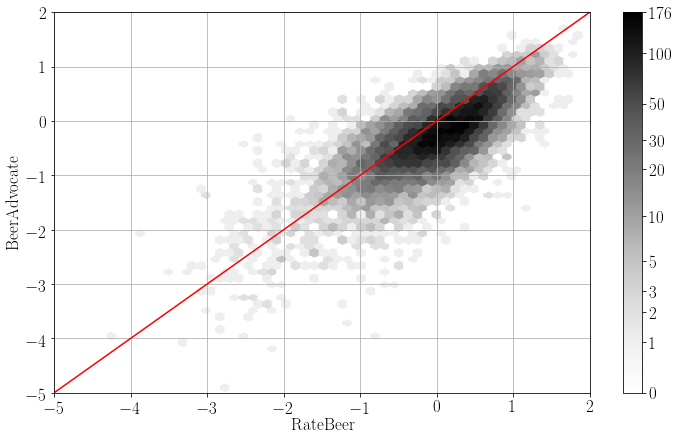

In [242]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 176]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

hb = ax.hexbin(df['rb']['zscore'], df['ba']['zscore'], gridsize=50, bins='log', cmap='Greys')
ax.plot([-5, 2], [-5, 2], 'red')

ax.axis([-5, 2, -5, 2])

#cb1 = plt.colorbar(hb, ax=ax)

#nbr_ticks = 10
#delta = (cb1.vmax - cb1.vmin)/nbr_ticks

#ticks = []
#log_ticks = []
#for i in np.arange(cb1.vmin, cb1.vmax+delta, delta):
#    log_ticks.append(i)
#    if i == cb1.vmin or i == cb1.vmax:
#        ticks.append('{:.0f}'.format(10**i-1))
#    else:
#        ticks.append('{:.2f}'.format(10**i-1))

#cb1.remove()
        
cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()
plt.savefig(save_folder + 'hexhist_zscores.pdf', bbox_inches='tight')

# Get furthest points

In [243]:
idx = df[df['ba']['beer_id'] == 150864].index[0]

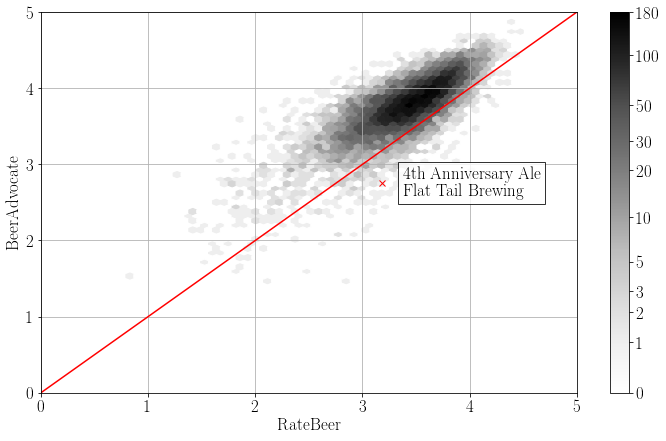

In [244]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 180]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))
    
key = 'avg_computed'

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

hb = ax.hexbin(df['rb'][key], df['ba'][key], gridsize=50, bins='log', cmap='Greys')
ax.plot([0, 5], [0, 5], 'red')

ax.axis([0, 5, 0, 5])

#cb1 = plt.colorbar(hb, ax=ax)

#nbr_ticks = 10
#delta = (cb1.vmax - cb1.vmin)/nbr_ticks

#ticks = []
#log_ticks = []
#for i in np.arange(cb1.vmin, cb1.vmax+delta, delta):
#    log_ticks.append(i)
#    if i == cb1.vmin or i == cb1.vmax:
#        ticks.append('{:.0f}'.format(10**i-1))
#    else:
#        ticks.append('{:.2f}'.format(10**i-1))
#
#cb1.remove()

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()

row = df.loc[idx]
name = row['ba']['beer_name'] + '\n' + row['ba']['brewery_name'] 
x = row['rb'][key]
y = row['ba'][key]

plt.plot([x], [y], 'x', linewidth=2, color='r')

plt.text(x+0.2, y, name, horizontalalignment='left', verticalalignment='center',
        bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.savefig(save_folder + 'hexhist_ratings_example.pdf', bbox_inches='tight')

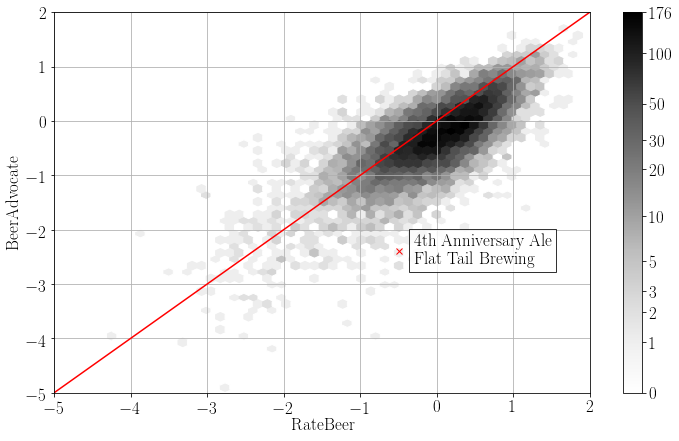

In [245]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 176]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))
    
key = 'zscore'

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

hb = ax.hexbin(df['rb'][key], df['ba'][key], gridsize=50, bins='log', cmap='Greys')
ax.plot([-5, 2], [-5, 2], 'red')

ax.axis([-5, 2, -5, 2])

#cb1 = plt.colorbar(hb, ax=ax)

#nbr_ticks = 10
#delta = (cb1.vmax - cb1.vmin)/nbr_ticks

#ticks = []
#log_ticks = []
#for i in np.arange(cb1.vmin, cb1.vmax+delta, delta):
#    log_ticks.append(i)
#    if i == cb1.vmin or i == cb1.vmax:
#        ticks.append('{:.0f}'.format(10**i-1))
#    else:
#        ticks.append('{:.2f}'.format(10**i-1))
#
#cb1.remove()

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()

row = df.loc[idx]
name = row['ba']['beer_name'] + '\n' + row['ba']['brewery_name'] 
x = row['rb'][key]
y = row['ba'][key]

plt.plot([x], [y], 'x', linewidth=2, color='r')

plt.text(x+0.2, y, name, horizontalalignment='left', verticalalignment='center',
        bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.savefig(save_folder + 'hexhist_zscores_example.pdf', bbox_inches='tight')